# Lab 8: Define and Solve an ML Problem of Your Choosing

In [144]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [145]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


whr_df = pd.read_csv(WHRDataSet_filename)# YOUR CODE HERE

whr_df.head()

country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.476600   
1                                           0.391362   
2                                           0.394803   
3                                           0.465942   
4                                           0.475367   

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   GINI index (World Bank estimate), average 2000-15  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   gini of household income reported in Gallup, by wp5-year  
0                                                NaN         
1                                           0.441906         
2                                           0.327318         
3                                           0.336764         
4                                           0.344540

In [146]:
whr_df.shape

(1562, 19)

In [147]:
whr_df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I've chosen the World Happiness Report (WHR) dataset.
2. I'll be predicting 'Life Ladder', which is the label in the dataset. Life ladder is total measure of happiness, quantified by a number on a scale of 0 to 10.
3. This is an example of supervised learning, as we have the label that the model will try to predict based on a set of features and their relationship to the label. This is a regression problem, since 'Life Ladder' contains continuous numbers that can increase/decrease with changes in the feature values.
4. The current features include country, year, Log GDP per capital, social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality, Standard deviation of ladder by country-year, Standard deviation/Mean of ladder by country-year, GINI index, GINI index average 2000-15', and gini of household income. However, a few of these columns like GINI index have many undefined values and may be removed from the feature set.
5. This machine learning problem aims to estimate a happiness level, 'Life Ladder', based on different economic and social indicators. This can be helpful for companies to assess conditions of certain geographic areas. For example, if a company is advertising a leisure product or service, it may do better in areas that have higher happiness indicators. Additionally other companies like non-profits may target certain areas with lower happiness indices, if they are offering a relevant service like mental health support. Comapnies can use 'Life ladder' as a benchmark for the quality of life, and center their investment or design decisions around a particular areas predicted 'Life Ladder'. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [148]:
# YOUR CODE HERE
# Renaming columns and creating a new df to manipulate 

new_names = {'Life Ladder': 'Happiness',
            'Log GDP per capita': 'LogGDP',
            'Social support': 'Support',
            'Healthy life expectancy at birth': 'Life_Expectancy',
            'Freedom to make life choices': 'Freedom',
            'Perceptions of corruption': 'Corruption',
            'Positive affect': 'Positive',
            'Negative affect': 'Negative',
            'Confidence in national government': 'Govmt_Confidence',
            'Standard deviation of ladder by country-year': 'Ladder_Std',
            'Standard deviation/Mean of ladder by country-year': 'Ladder_Std_GINI',
            'GINI index (World Bank estimate)': 'GINI',
            'GINI index (World Bank estimate), average 2000-15': 'GINI_avg',
            'gini of household income reported in Gallup, by wp5-year': 'GINI_gallup',
            'Democratic Quality': 'Democratic',
            'Delivery Quality': 'Delivery'
    
}

df = whr_df.rename(new_names, axis = 1)

In [149]:
df['year'].value_counts().sort_index()

2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    142
2013    137
2014    145
2015    143
2016    142
2017    141
Name: year, dtype: int64

In [150]:
# Selecting a subset of years to avoid influence of economic conditions, and have the most relevant/full data
df1517 = df[df.year.isin(range(2015,2018))]
df1517.shape

(426, 19)

In [151]:
# Examining the data
df_summ = df1517.describe()
df_summ

year   Happiness      LogGDP     Support  Life_Expectancy  \
count   426.000000  426.000000  412.000000  424.000000       424.000000   
mean   2015.995305    5.429473    9.296196    0.805380        63.174605   
std       0.817443    1.123839    1.195084    0.123863         7.673240   
min    2015.000000    2.661718    6.473706    0.290184        43.589157   
25%    2015.000000    4.588015    8.441896    0.739875        57.639421   
50%    2016.000000    5.423854    9.500179    0.830156        64.923119   
75%    2017.000000    6.220931   10.257286    0.905651        68.865871   
max    2017.000000    7.788252   11.693157    0.987343        76.536362   

          Freedom  Generosity  Corruption    Positive    Negative  \
count  420.000000  409.000000  393.000000  424.000000  424.000000   
mean     0.763507    0.000053    0.739327    0.707159    0.285288   
std      0.131172    0.160586    0.187573    0.104301    0.089361   
min      0.303540   -0.296735    0.047311    0.369440    0.103494   
25%      0.679010   -0.115944    0.687854    0.624605    0.217804   
50%      0.782926   -0.027512    0.800047    0.713184    0.276852   
75%      0.863263    0.097172    0.862888    0.795447    0.337477   
max      0.985178    0.666991    0.969483    0.924561    0.642589   

       Govmt_Confidence  Democratic    Delivery  Ladder_Std  Ladder_Std_GINI  \
count        389.000000  279.000000  279.000000  426.000000       426.000000   
mean           0.483854   -0.131584    0.003767    2.154299         0.422787   
std            0.199444    0.901095    1.018081    0.427641         0.149844   
min            0.084061   -2.448228   -2.126180    1.154061         0.169937   
25%            0.315261   -0.736015   -0.716805    1.816168         0.318116   
50%            0.463772   -0.177854   -0.181768    2.137100         0.398161   
75%            0.620333    0.650620    0.820801    2.453355         0.499389   
max            0.993604    1.540097    2.100870    3.527820         1.022769   

            GINI    GINI_avg  GINI_gallup  
count  30.000000  376.000000   424.000000  
mean    0.407967    0.384383     0.454486  
std     0.086769    0.083198     0.108735  
min     0.255000    0.228833     0.223470  
25%     0.344000    0.320300     0.374108  
50%     0.417000    0.369625     0.428309  
75%     0.477750    0.432000     0.532014  
max     0.571000    0.626000     0.852040

In [152]:
# Checking missing values
nan_count = np.sum(df1517.isnull(), axis = 0)
nan_count

country               0
year                  0
Happiness             0
LogGDP               14
Support               2
Life_Expectancy       2
Freedom               6
Generosity           17
Corruption           33
Positive              2
Negative              2
Govmt_Confidence     37
Democratic          147
Delivery            147
Ladder_Std            0
Ladder_Std_GINI       0
GINI                396
GINI_avg             50
GINI_gallup           2
dtype: int64

In [153]:
# Keeping note of high missing values for GINI Index (world bank estimate) 

In [154]:
# Calculating correlation between features and label
corrs = df1517.corr()['Happiness'].drop('Happiness', axis = 0)
corrs

year                0.029565
LogGDP              0.795964
Support             0.742077
Life_Expectancy     0.758202
Freedom             0.539694
Generosity          0.150937
Corruption         -0.444353
Positive            0.542396
Negative           -0.462716
Govmt_Confidence   -0.118905
Democratic          0.623771
Delivery            0.730502
Ladder_Std         -0.423140
Ladder_Std_GINI    -0.840532
GINI                0.249486
GINI_avg           -0.248880
GINI_gallup        -0.406981
Name: Happiness, dtype: float64

In [155]:
corrs_sorted = corrs.sort_values(ascending = False) 
top_two_corr = list(corrs_sorted.index[:2])
top_two_corr

['LogGDP', 'Life_Expectancy']

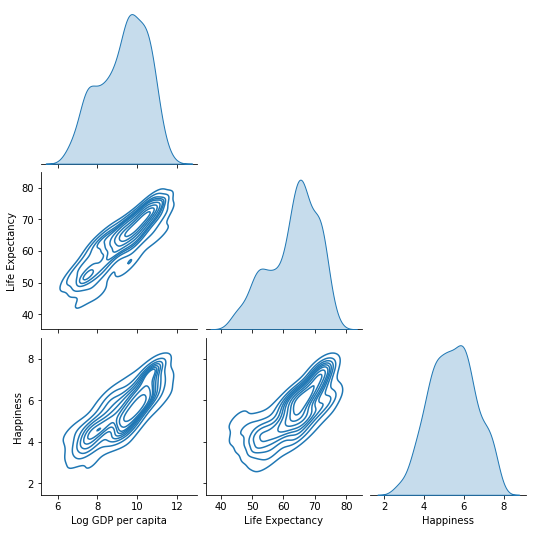

In [156]:
df_corrs = pd.DataFrame({'Log GDP per capita': df1517['LogGDP'], 'Life Expectancy': df1517['Life_Expectancy'], 'Happiness': df1517['Happiness']})
sns.pairplot(data = df_corrs, kind = 'kde', corner = True)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

#### Modeling Plan 

After exploring the dataset and observing feature correlation and distributions, I've changed my feature list to remove columns with weak correlation. I dropped the features 'year', which was more categorical, 'GINI index (World Bank estimate)' for having too many missing values, and 'Confidence in national government'. After that, I used my understanding of the features, and context from the WHR report website to select features. The final feature set includes feaures that show stronger relationships with 'Life Ladder', like 'Log GDP per capita', 'Healthy Life expectancy at birth', and 'Social Support'.

To prepare the dataset for modeling, I plan to apply a few different preprocessing techniques. To address missing values, I plan to fill them with the means for each column. Since I know they are all float columns, there is no need for additional steps to deal with categorical variables. I also plan to use StandardScaler to scale the featues. 

I decided to choose a linear regression as the starting model type, since it is simple and easy to interpret. I'll be using a train test split of 70/30 to train and evaluate the linear regression model. The performance of the model will be captured by several variables, which include mean absolute error (MAE), mean squared error (MSE), and R-squared score. I also plan to apply k-fold cross validation to test if the model is good at generalizing and is not overfitting.

To improve model performance, I will test out some feature selection methods and tune the models with different hyperparameters. To find the best parameters I'll use GridSearch. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [157]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [158]:
# YOUR CODE HERE
# Data preparation: Feature Selection & filling missing values
df1517 = df1517.fillna(df1517.mean())
np.sum(df1517.isnull(), axis = 0)

country             0
year                0
Happiness           0
LogGDP              0
Support             0
Life_Expectancy     0
Freedom             0
Generosity          0
Corruption          0
Positive            0
Negative            0
Govmt_Confidence    0
Democratic          0
Delivery            0
Ladder_Std          0
Ladder_Std_GINI     0
GINI                0
GINI_avg            0
GINI_gallup         0
dtype: int64

In [159]:
features = ['LogGDP', 'Support', 'Life_Expectancy', 'Freedom',
           'Generosity', 'Corruption', 'GINI_avg']

X = df1517[features]
y = df1517['Happiness'] 

In [160]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1234
)

model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
y_pred = model.predict(X_test)

print("Test Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred).round(4))
print("MSE:", mean_squared_error(y_test, y_pred).round(4))
print("R²:", r2_score(y_test, y_pred).round(4))

Test Set Performance:
MAE: 0.4428
MSE: 0.3011
R²: 0.7683


In [163]:
Test Set Performance:
MAE: 0.2184396162967608
MSE: 0.08590404206551146
R²: 0.9333342403586612

SyntaxError: invalid syntax (<ipython-input-163-28561e17aa75>, line 1)

In [ ]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores.round(2))
print("Average R²:", np.mean(cv_scores).round(2))
print("Standard deviation:", np.std(cv_scores).round(2))

I ran 5-fold cross-validation to understand how the linear regression model performs across different subsets. The R^2 scores were: [0.71, 0.77, 0.80, 0.53, 0.75] with an average of 0.71 and a standard deviation of 0.10. This is lower than my earlier single test split R^2 of 0.77, so there’s definitely room to improve.

Next, I’m planning to:
- Try more features like Positive and Govmt_Confidence
- Test out other models like Random forest

My goal is to boost R^2 and make the model more consistent.

#### Heuristic Feature Selection

In [ ]:
features_extended = [
    'LogGDP', 'Support', 'Life_Expectancy', 'Freedom', 'Generosity',
    'Corruption', 'GINI_avg', 'Positive', 'Negative', 'Govmt_Confidence',
    'Democratic', 'Delivery'
]

X = df1517[features_extended]
y = df1517['Happiness']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1234
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Heuristic Selection Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred).round(4))
print("MSE:", mean_squared_error(y_test, y_pred).round(4))
print("R²:", r2_score(y_test, y_pred).round(4))

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("")
print("Cross-validated R² scores:", cv_scores.round(2))
print("Average R²:", np.mean(cv_scores).round(2))
print("Standard deviation:", np.std(cv_scores).round(2))

#### Random Forest Model:

In [123]:

X = df1517[features]
y = df1517['Happiness']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1234
)

rf_model = RandomForestRegressor(n_estimators=100, random_state=1234)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred).round(4))
print("MSE:", mean_squared_error(y_test, y_pred).round(4))
print("R²:", r2_score(y_test, y_pred).round(4))

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("")
print("Cross-validated R² scores:", cv_scores.round(2))
print("Average R²:", np.mean(cv_scores).round(2))
print("Standard deviation:", np.std(cv_scores).round(2))

Random Forest Model Performance:
MAE: 0.31852261223192846
MSE: 0.1853368485085684
R²: 0.8573996190069894

Cross-validated R² scores: [0.71 0.77 0.8  0.53 0.75]
Average R²: 0.71
Standard deviation: 0.1


Overall, I was able to increase my R2 values, however there is still more room for it to improve. 